In [2]:
import csv
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import datetime as dt
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline
dates = []
prices = []
btc_file = 'coindesk-bpi-USD-close_data-2010-07-17_2017-06-27.csv'
eth_file = 'coindesk-ETH-close_data-2015-08-31_2017-06-26.csv'

Using TensorFlow backend.


<function matplotlib.pyplot.show>

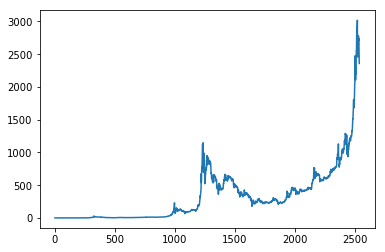

In [3]:
# Import CSV retrieved from Coindesk
btc_df = pd.read_csv(btc_file)

# Convert Date to numeric for regression
btc_df['Date'] = pd.to_datetime(btc_df['Date'])
btc_df['Date'] = pd.to_timedelta(btc_df['Date'])
btc_df['Date'] = btc_df['Date'].dt.days
# Flatten to ndarray

dates = btc_df.loc[:,'Date'].values.ravel()
prices = btc_df.loc[:,'ClosePrice'].values.ravel()

# Reshape the data
dates = np.reshape(dates, (len(dates), 1))
prices = np.reshape(prices, (len(prices), 1)).flatten()

# Plot the price history data for bitcoin
plt.plot(prices)
plt.show

In [ ]:
# Assign kernel to variable
#svr_lin = SVR(kernel='linear', C=1e3)
#svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
#svr_poly = SVR(kernel='poly', C=1e3, degree=2)

# Fit the data
#svr_rbf = svr_rbf.fit(dates, prices)
#svr_lin = svr_lin.fit(dates, prices)
#svr_poly = svr_poly.fit(dates, prices)

# Plot the findings
#plt.scatter(dates, prices, color='black', label='data')
#plt.plot(dates, svr_rbf.predict(dates), color='blue', label='RBF model')
#plt.plot(dates, svr_lin.predict(dates), color='red', label='Linear Model')
#plt.plot(dates, svr_poly.predict(dates, color='green', label='Polynomial model')
#plt.xlabel('Dates')
#plt.ylabel('Prices')
#plt.title('Support Vector Regression of BTC Pricing')
#plt.legend()
#plt.show()

In [4]:
model = Sequential()
model.add(Dense(8, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(dates, prices, epochs=100, batch_size=3, verbose=1)

/Users/SG/anaconda3/lib/python3.6/site-packages/keras/models.py:851: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
2537/2537 [==============================] - 2s - loss: 659012.3837 - acc: 0.0000e+00        